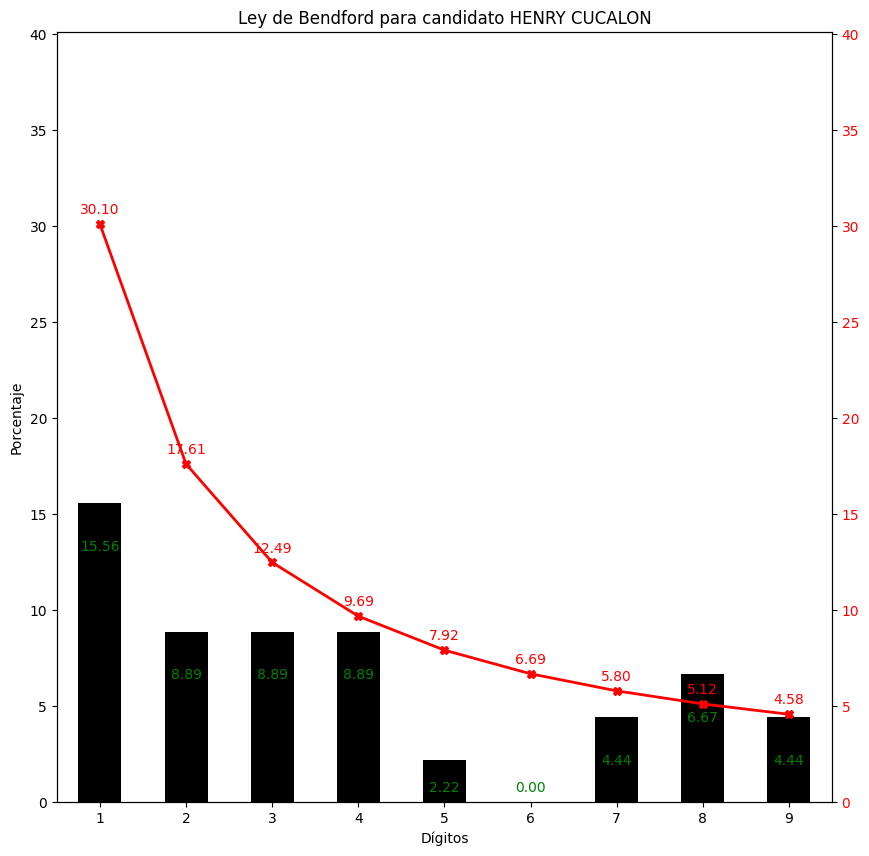

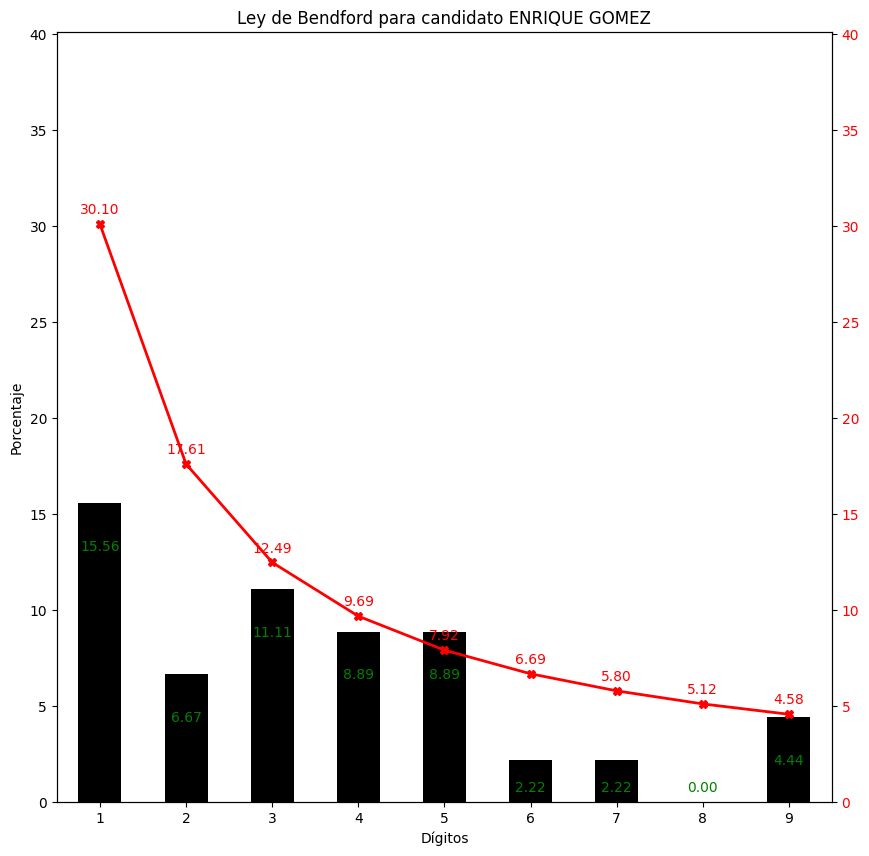

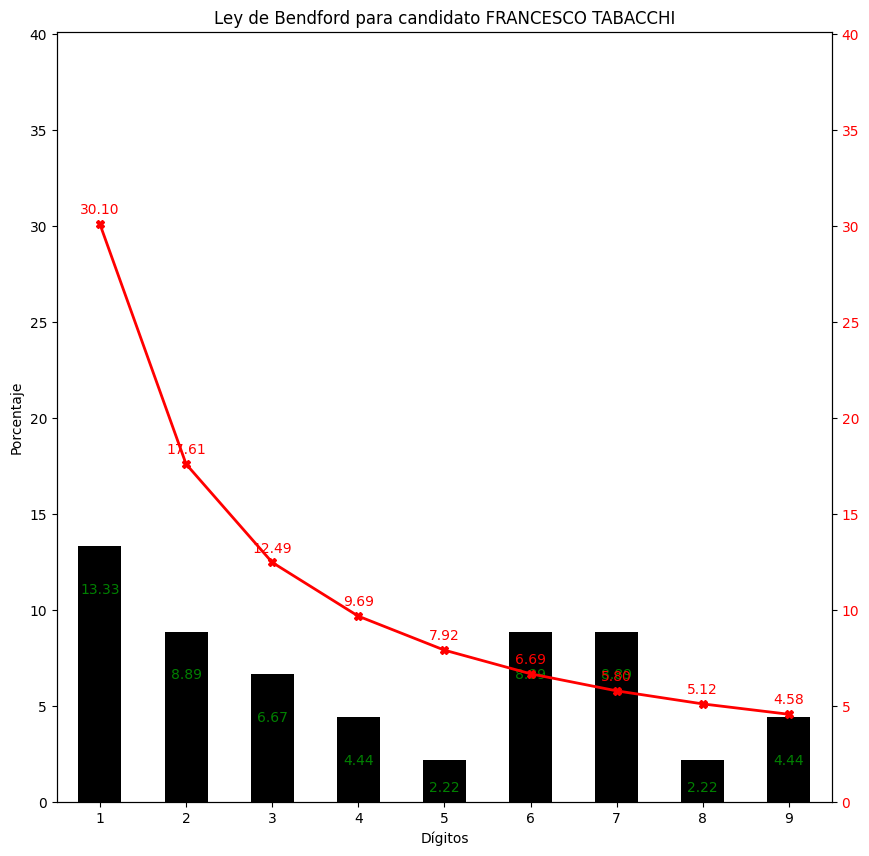

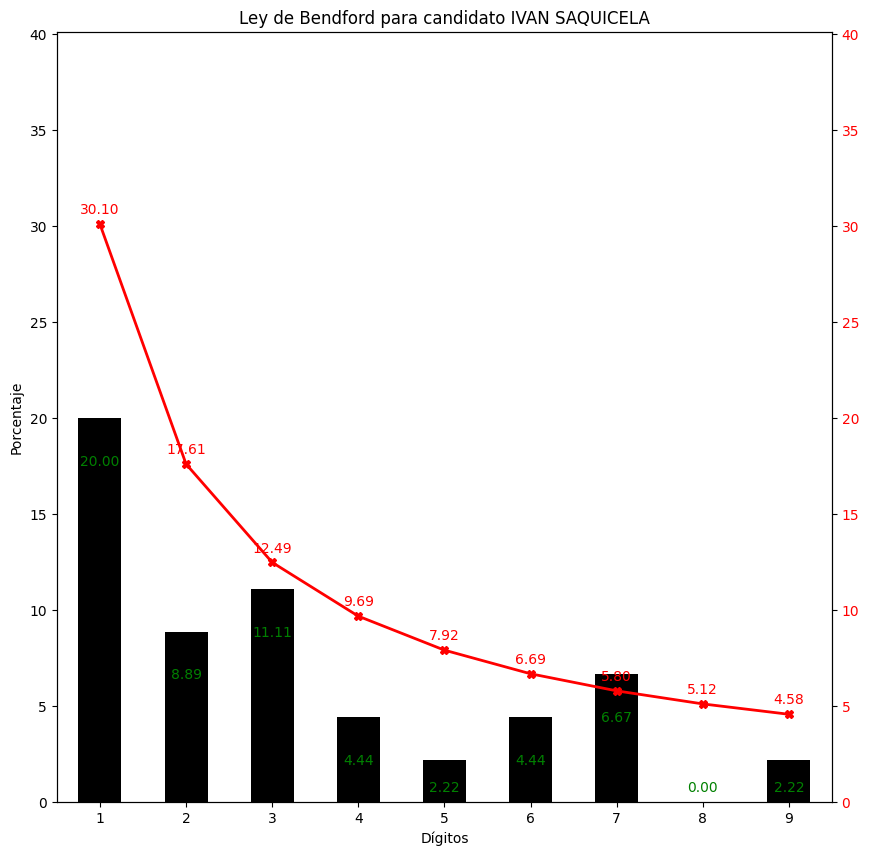

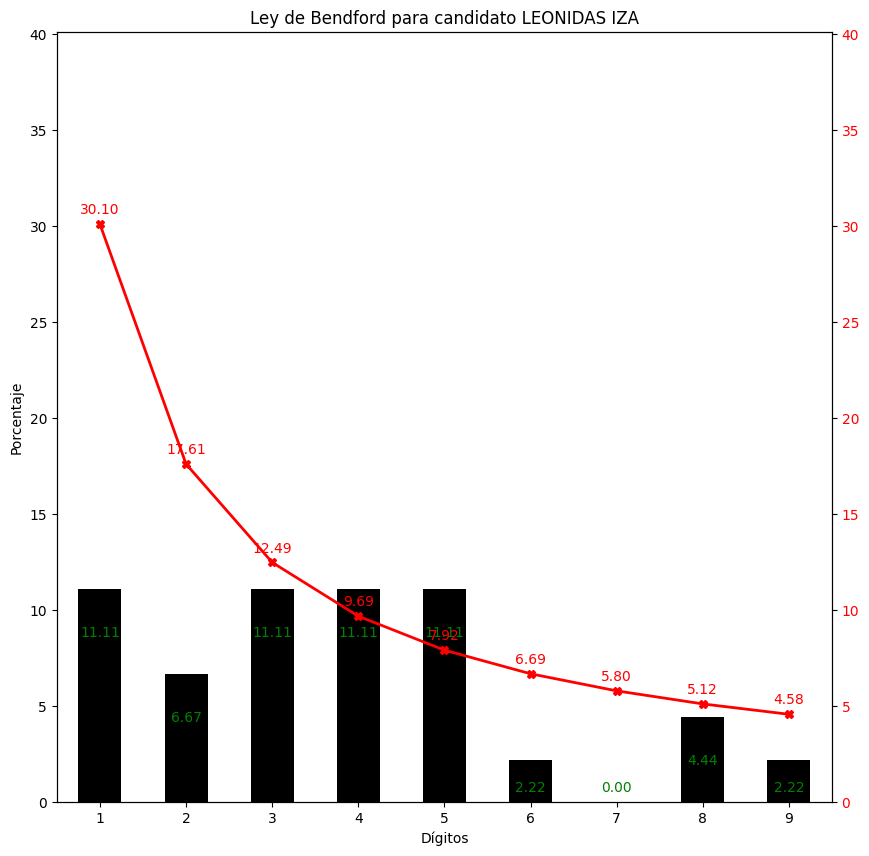

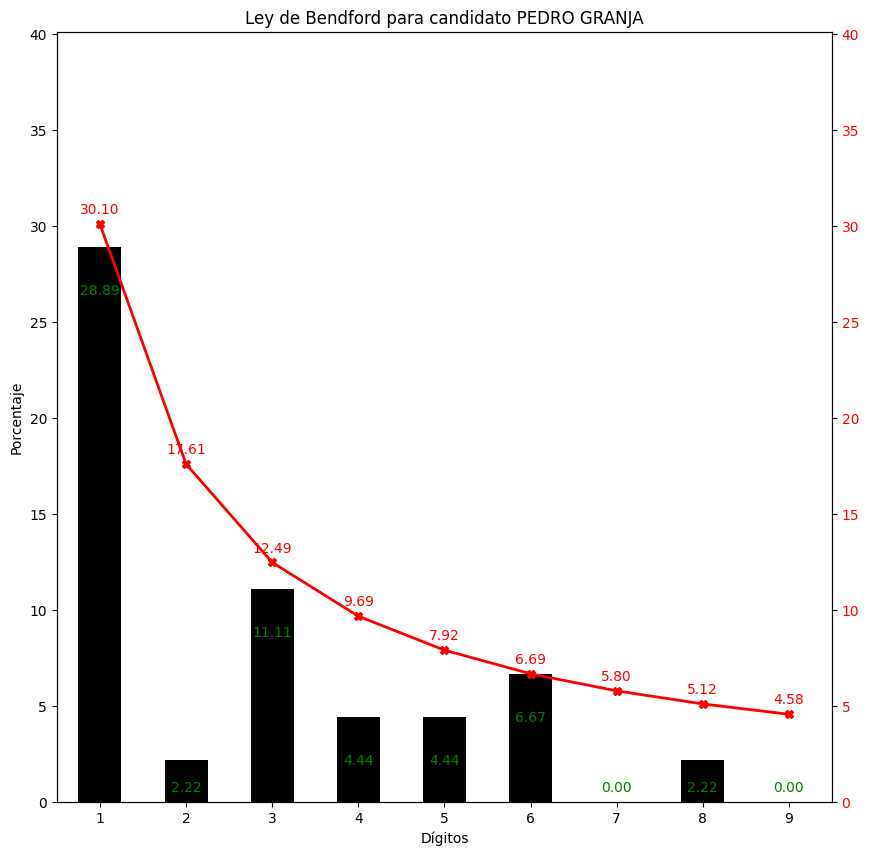

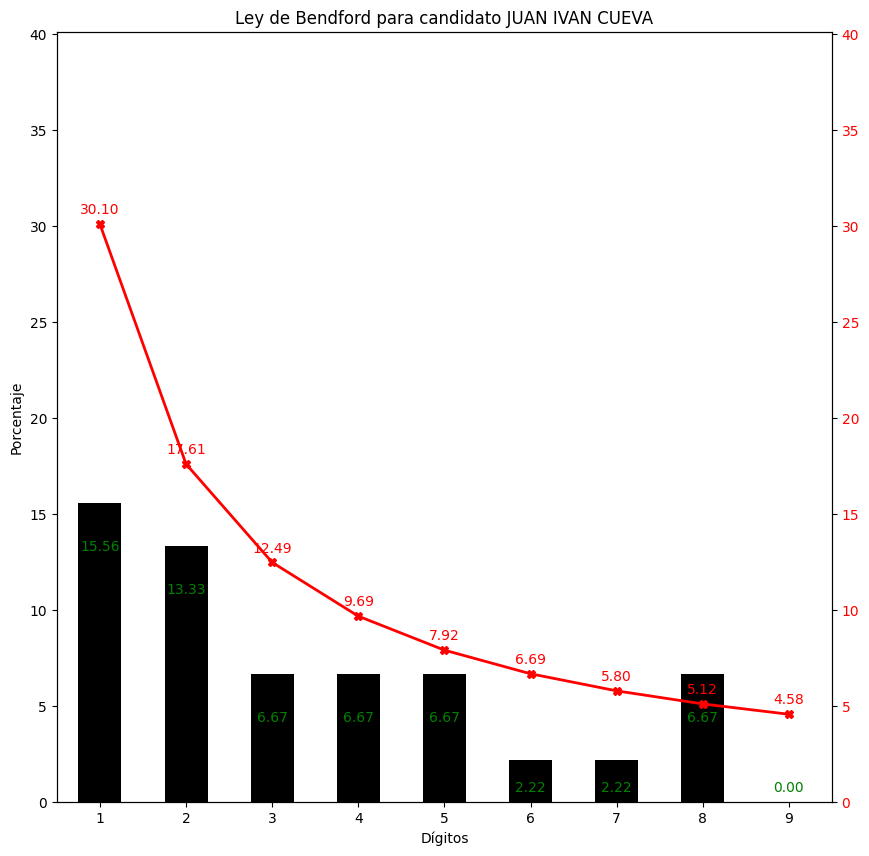

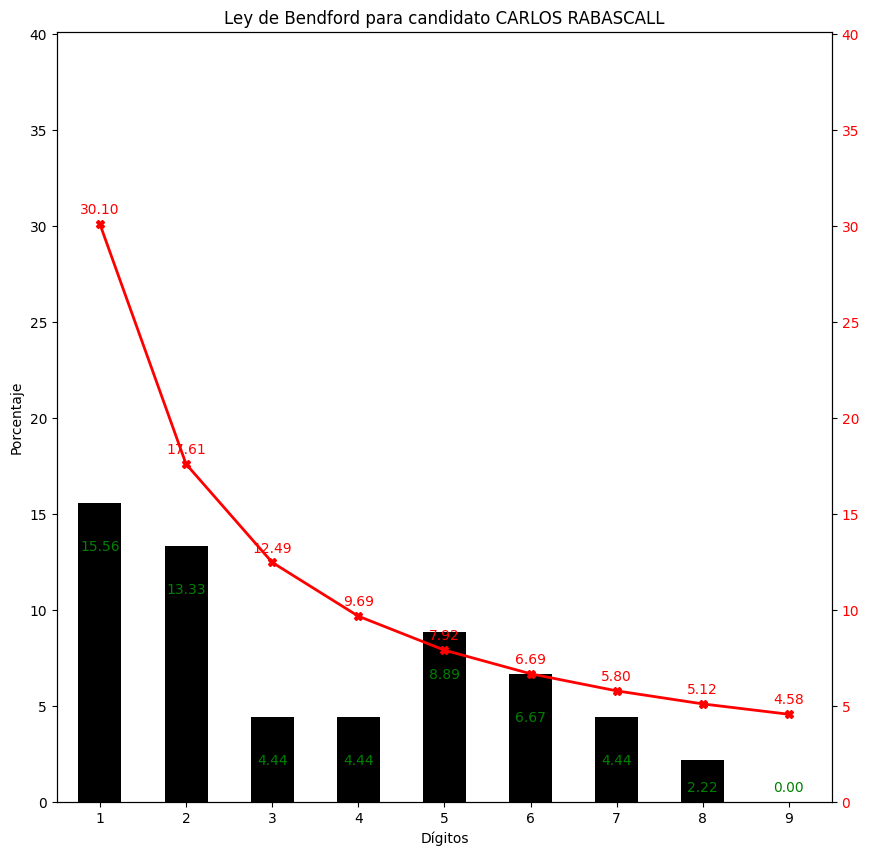

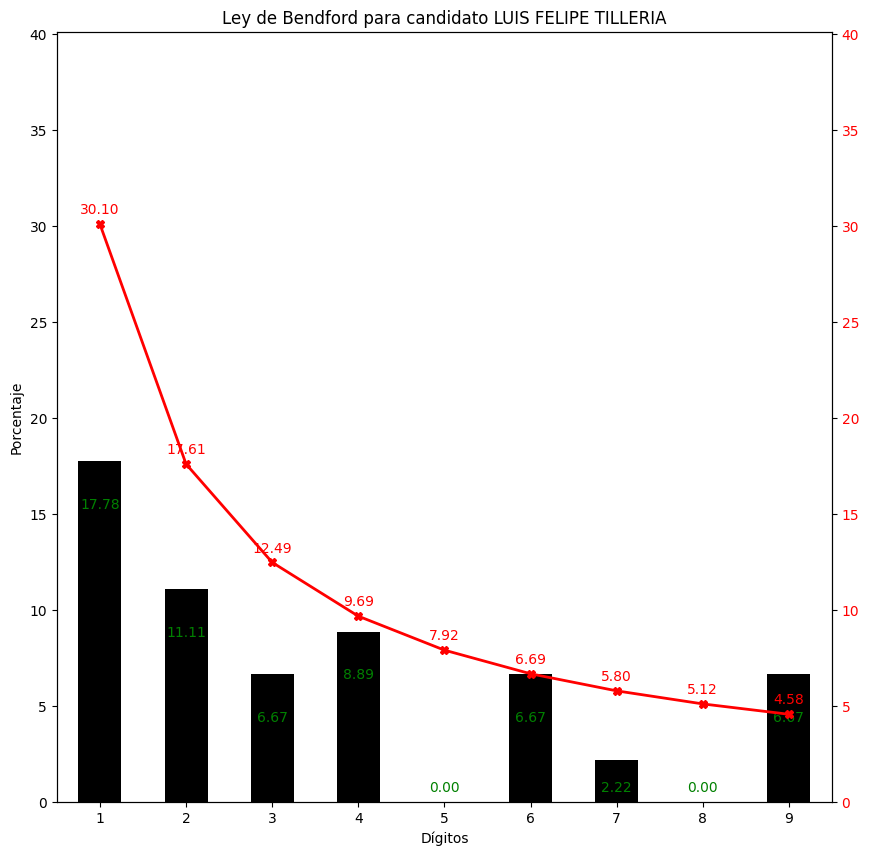

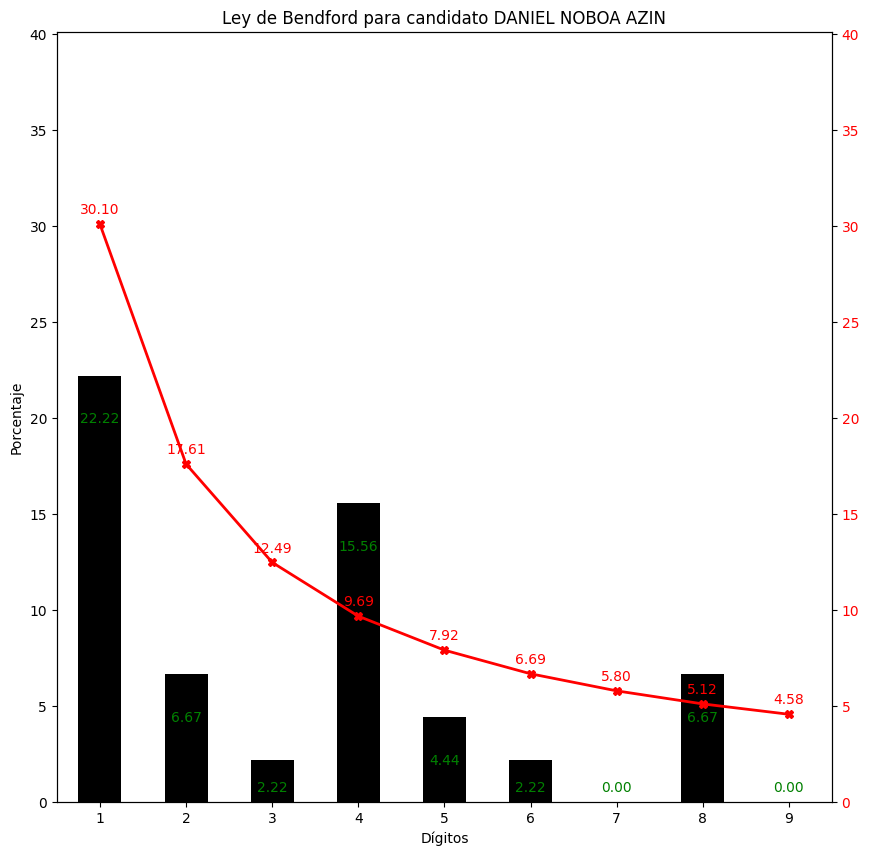

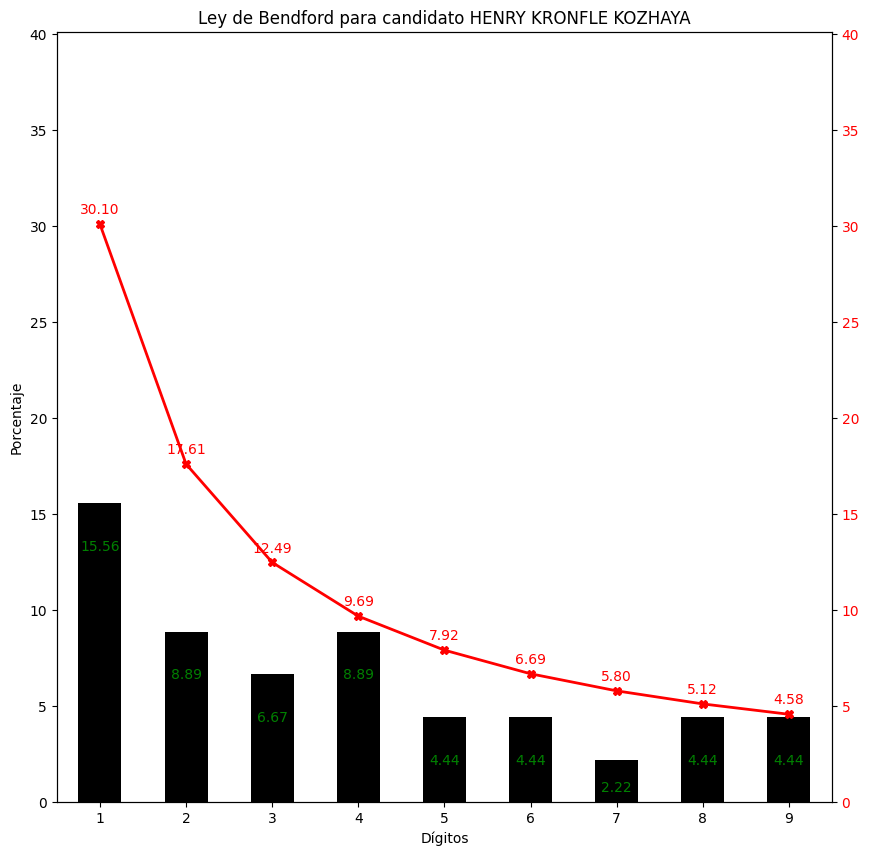

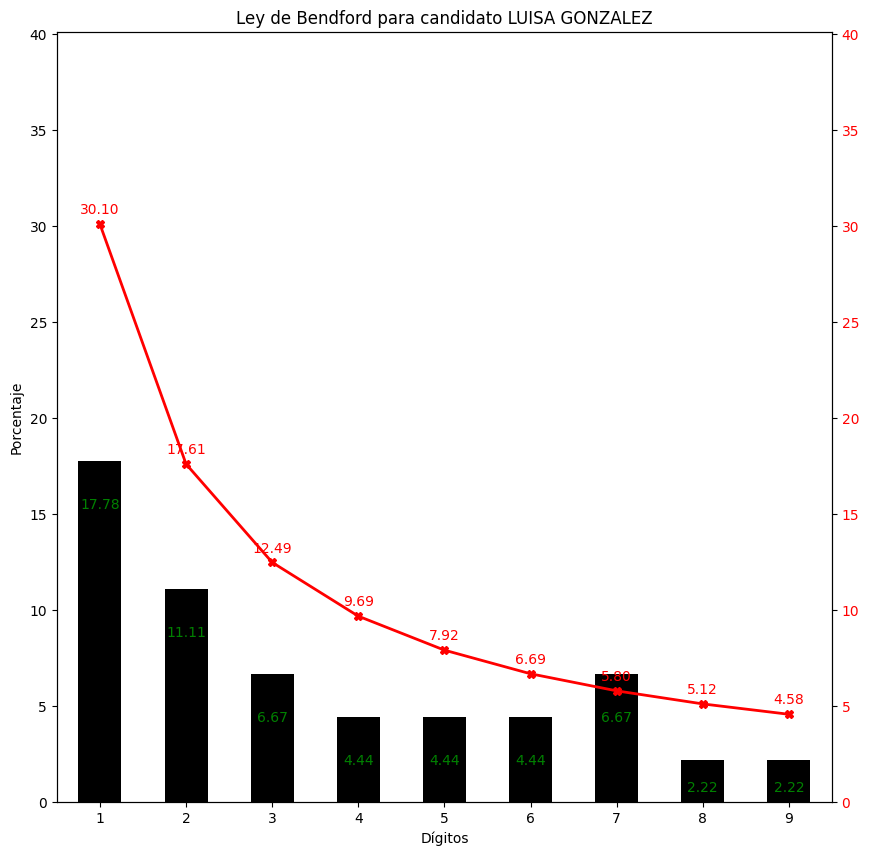

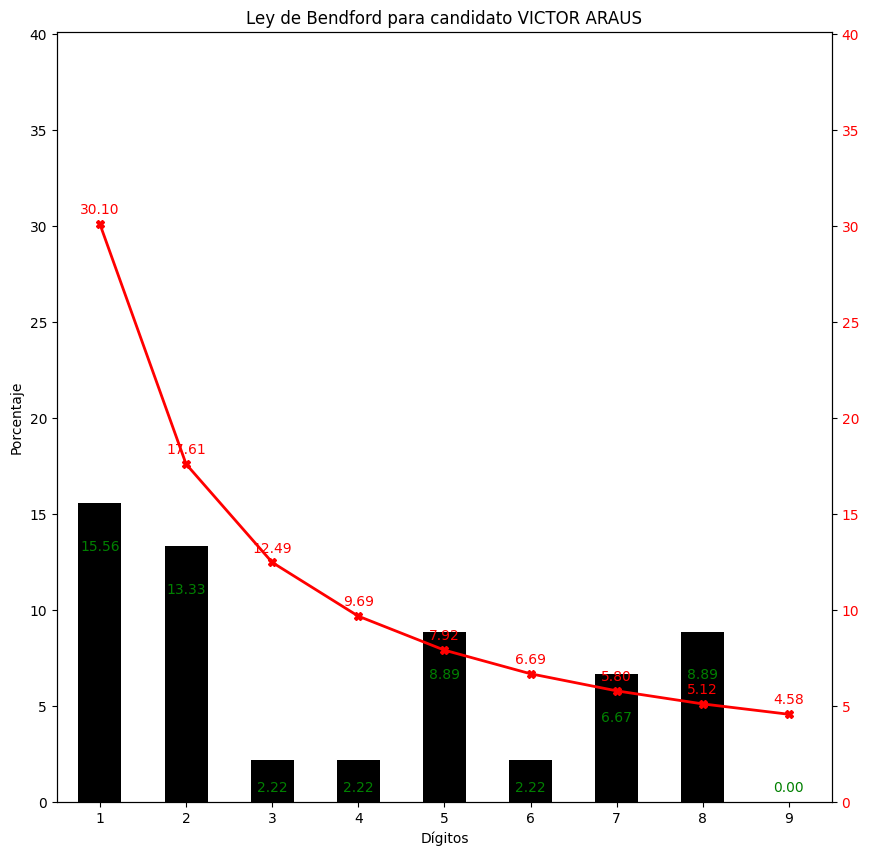

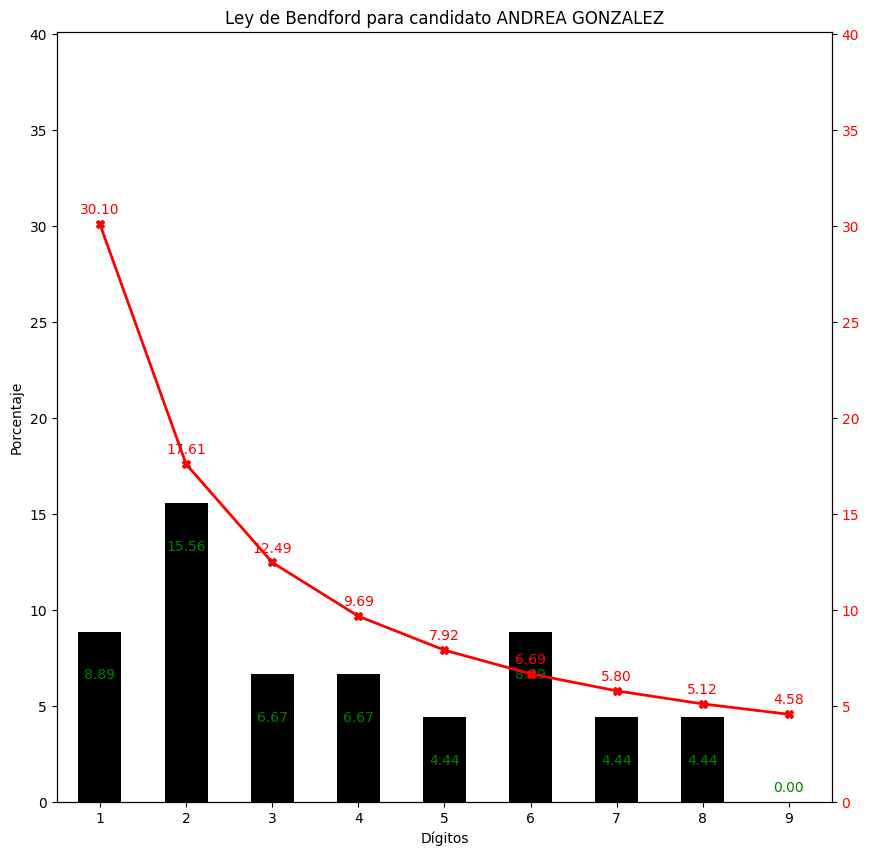

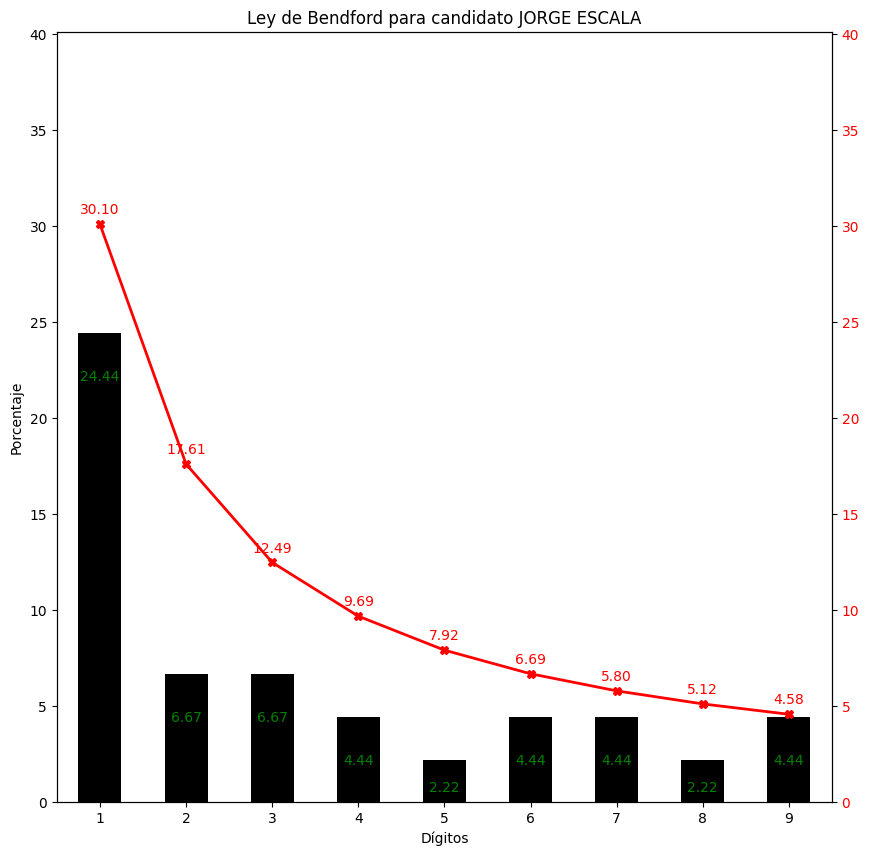

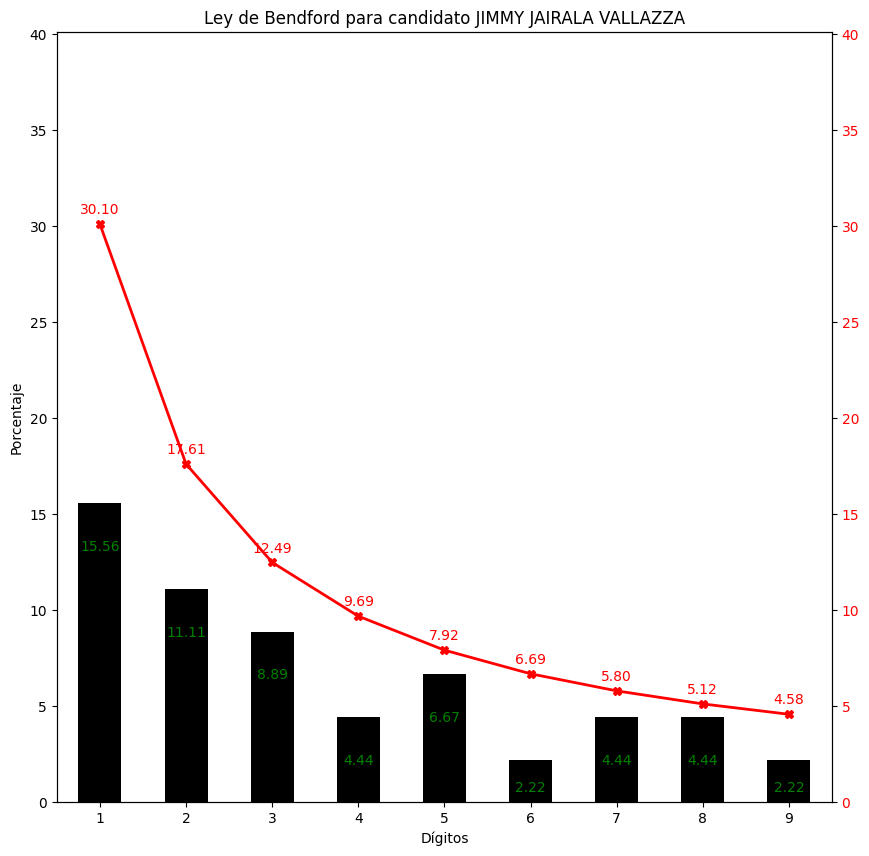

In [94]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import math

def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            y_pos = y_value - 3
            if y_pos < 0:
                y_pos = 0


            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_pos), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, color= "green")     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va, color="red")  

df_data_candidatos = pd.DataFrame(columns=['COD_CANDIDATO', 'NOM_PARTIDO', 'NOM_CANDIDATO'])

with open('datos.json', 'r') as file:
    data = json.load(file)
    for i in data['data']:
        df_data_candidatos.loc[len(df_data_candidatos)] = [i['COD_CANDIDATO'], i['NOM_PARTIDO'], i['NOM_CANDIDATO']]


df_data_votos = pd.DataFrame(columns=['provincia', 'COD_CANDIDATO', 'VOTOS','DIGITO'])

archivos = glob.glob("provincias/*.json")
for archivo in archivos:
    nombre_provincia = archivo.replace('provincias/', '').replace('.json','')
    with open(archivo, 'r') as file:
        data = json.load(file)
        for i in data['data']:
            df_data_votos.loc[len(df_data_votos)] = [nombre_provincia, i['COD_CANDIDATO'], i['VOTOS'], int(str(i['VOTOS'])[0])]


for index, candidato in df_data_candidatos.iterrows():
    df_votos_por_candidato = df_data_votos[df_data_votos['COD_CANDIDATO'] == candidato['COD_CANDIDATO']]
    
    df_bendford_por_candidato = pd.DataFrame(columns=['DIGITO', 'CONTEO', 'PORCENTAJE','BENDFORDLAW'])
    for i in range(1, 10):
        conteo = df_votos_por_candidato['DIGITO'].value_counts().get(i, 0)
        bendford = round(math.log10(1 + (1/i))*100, 2)
        df_bendford_por_candidato.loc[i] = [i,conteo, 0, bendford]
    
    df_bendford_por_candidato['PORCENTAJE'] = round((df_bendford_por_candidato['CONTEO'] / df_bendford_por_candidato['DIGITO'].sum()) * 100, 2)
    
    maximo = df_bendford_por_candidato['BENDFORDLAW'].max() + 10
    if df_bendford_por_candidato['PORCENTAJE'].max() > df_bendford_por_candidato['BENDFORDLAW'].max():
        maximo =  df_bendford_por_candidato['PORCENTAJE'].max() + 10
    
    barras = df_bendford_por_candidato['PORCENTAJE'].plot(kind="bar", figsize=(10, 10), color="#000000")
    barras.set_ylabel("Porcentaje")
    barras.set_xlabel("Dígitos")
    barras.set_ylim(0, maximo)
    for tick in barras.get_xticklabels():
        tick.set_rotation(0)
    
    linea = barras.twinx()
    linea.plot(barras.get_xticks(),df_bendford_por_candidato['BENDFORDLAW'],color="#FF0000", linewidth=2, marker = "X")
    linea.grid(False)
    linea.set_ylim(0, maximo)
    
    add_value_labels(barras, typ='bar')
    add_value_labels(linea, typ='line')
    linea.tick_params(labelcolor="red", axis='y')
    
    plt.title(f"Ley de Bendford para candidato {candidato['NOM_CANDIDATO']}")
    plt.show()


